### regression analysis (BMI (INI21001) ~ PDE3B)

In [1]:
library(data.table)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


In [2]:
data_all <- fread(
    'zcat < ../../../private_data/FigS13-15_regression_data.tsv.gz', 
    header=TRUE,
    data.table=FALSE
)

Read 488370 rows and 53 (of 53) columns from 0.189 GB file in 00:00:04


In [12]:
data_all %>% group_by(PDE3E) %>% summarise(n())

PDE3E,n()
-9,869
0,486554
1,947


In [3]:
repo_dir <- normalizePath('../../../')
out_dir <- file.path(repo_dir, 'figs', basename(getwd()))

In [4]:
data <- data_all %>% mutate(
    sex_label = ifelse(sex == 0, 'female', 'male'),
    x = PDE3E,
    y = INI21001
) %>% filter(
    white_british == TRUE &
    sex != -9 &
    age > 0 & 
    x != -9 &
    y != -9    
)

y_lab <- 'BMI'
x_lab <- expression(paste("rs150090666 (", italic('PDE3B'), ")"))
file_name_head <- 'PDE3B_BMI'

data %>% dim() %>% print()

[1] 335585     56


#### the following snippents are semi-automated

In [5]:
p <- ggplot(
    data, 
    aes(x = as.factor(x), y = y, color=factor(x))) +
geom_boxplot(outlier.size = 0, outlier.stroke = 0) +
stat_summary(
    fun.y=mean, geom="errorbar", 
    aes(ymax = ..y.., ymin = ..y..),
    width = 1.1, linetype = "dashed"
) + 
labs(y = y_lab, x = x_lab) +
coord_cartesian(
    ylim=c(14,40)
) + 
facet_grid(sex_label ~ .)


Saving 7 x 7 in image


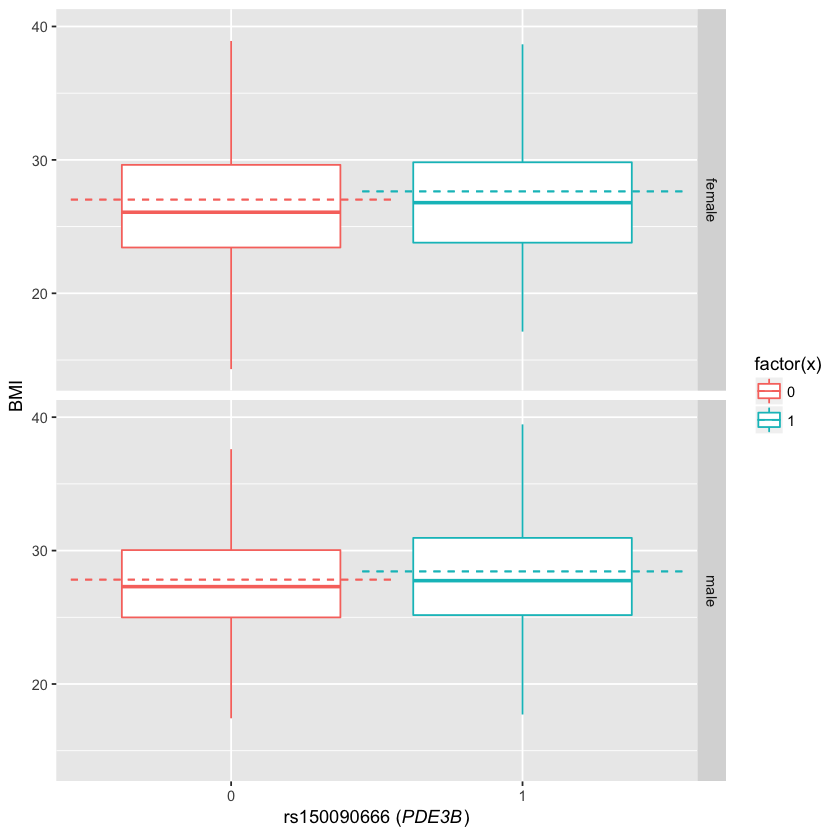

In [6]:
p  + 
ggsave(
    file.path(out_dir, paste0(file_name_head, '.pdf'))
)

In [7]:
aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, mean
) %>% print()

aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, median
) %>% print()

aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, length
) %>% print()


  as.factor(x) as.factor(sex_label)        y
1            0               female 27.02448
2            1               female 27.63804
3            0                 male 27.82390
4            1                 male 28.43859
  as.factor(x) as.factor(sex_label)        y
1            0               female 26.07710
2            1               female 26.79405
3            0                 male 27.29800
4            1                 male 27.74690
  as.factor(x) as.factor(sex_label)      y
1            0               female 179840
2            1               female    392
3            0                 male 155011
4            1                 male    342


In [8]:
lm_1 <- lm (
    y ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(x),
    data
)


In [9]:
summary(lm_1)


Call:
lm(formula = y ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + 
    PC4 + as.factor(x), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.259  -3.229  -0.737   2.384  47.812 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
age              0.025930   0.001020  25.434  < 2e-16 ***
as.factor(sex)0 25.228426   0.093926 268.600  < 2e-16 ***
as.factor(sex)1 26.017439   0.094378 275.673  < 2e-16 ***
PC1             -0.004751   0.005320  -0.893 0.371847    
PC2             -0.005928   0.005504  -1.077 0.281471    
PC3              0.003587   0.005289   0.678 0.497690    
PC4              0.048938   0.002916  16.780  < 2e-16 ***
as.factor(x)1    0.647053   0.174489   3.708 0.000209 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.722 on 335577 degrees of freedom
Multiple R-squared:  0.9712,	Adjusted R-squared:  0.9712 
F-statistic: 1.412e+06 on 8 and 335577 DF,  p-value: < 2.2e-16


In [10]:
lm_age2 <- lm (
    y ~ 0 + age + I(age^2) + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(x),
    data
)


In [11]:
summary(lm_age2)


Call:
lm(formula = y ~ 0 + age + I(age^2) + as.factor(sex) + PC1 + 
    PC2 + PC3 + PC4 + as.factor(x), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.113  -3.225  -0.733   2.385  47.949 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
age              0.3037775  0.0168576  18.020  < 2e-16 ***
I(age^2)        -0.0021595  0.0001308 -16.512  < 2e-16 ***
as.factor(sex)0 16.4312630  0.5409752  30.373  < 2e-16 ***
as.factor(sex)1 17.2294517  0.5405067  31.876  < 2e-16 ***
PC1             -0.0046469  0.0053180  -0.874 0.382225    
PC2             -0.0060472  0.0055021  -1.099 0.271743    
PC3              0.0036170  0.0052869   0.684 0.493894    
PC4              0.0492539  0.0029152  16.895  < 2e-16 ***
as.factor(x)1    0.6431327  0.1744182   3.687 0.000227 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.72 on 335576 degrees of freedom
Multiple R-squared:  0.9712,	Adjusted R-squared:  0.9712